In [4]:
from supabase import create_client
import pandas as pd,os
from dotenv import load_dotenv
import matplotlib.pyplot as plt
load_dotenv()
supabase=create_client(os.getenv("SUPABASE_URL"),os.getenv("SUPABASE_KEY"))
data=supabase.table("churn_data").select("*").execute()
df=pd.DataFrame(data.data)
df.head()
df.info()
df.isnull().sum()
df.describe()
df.columns
churn_percentage = (df['churn'].value_counts(normalize=True) * 100).get('Yes', 0)
avg_monthly_by_contract = (
    df.groupby('contract')['monthly_charges']
      .mean()
      .round(2)
)
tenure_distribution = df['tenure_group'].value_counts()
internet_distribution = df['internet_service'].value_counts()
df['churn'] = df['churn'].astype(str).str.strip()

pivot_churn_tenure = pd.pivot_table(
    df,
    index='tenure_group',
    columns='churn',
    values='monthly_charges',
    aggfunc='count',
    fill_value=0
)
  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1000 non-null   int64  
 1   tenure                  1000 non-null   int64  
 2   monthly_charges         1000 non-null   float64
 3   total_charges           1000 non-null   float64
 4   churn                   1000 non-null   object 
 5   internet_service        1000 non-null   object 
 6   contract                1000 non-null   object 
 7   payment_method          1000 non-null   object 
 8   tenure_group            1000 non-null   object 
 9   monthly_charge_segment  1000 non-null   object 
 10  has_internet_service    1000 non-null   int64  
 11  is_multi_line_user      1000 non-null   int64  
 12  contract_type_code      1000 non-null   int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 101.7+ KB


In [6]:
import os
import pandas as pd

BASE_DIR = os.getcwd()
output_dir = os.path.join(BASE_DIR, "data", "processed")
os.makedirs(output_dir, exist_ok=True)

summary_path = os.path.join(output_dir, "analysis_summary.csv")

summary_df = pd.DataFrame({
    "Metric": [
        "Churn Percentage",
        *[f"Avg Monthly Charges - {k}" for k in avg_monthly_by_contract.index],
        *[f"Customers - {k}" for k in tenure_distribution.index]
    ],
    "Value": [
        round(churn_percentage, 2),
        *avg_monthly_by_contract.values,
        *tenure_distribution.values
    ]
})

summary_df.to_csv(summary_path, index=False)
print(f"✅ Analysis summary saved at:\n{summary_path}")


✅ Analysis summary saved at:
c:\coetraining\ETL1\data\processed\analysis_summary.csv


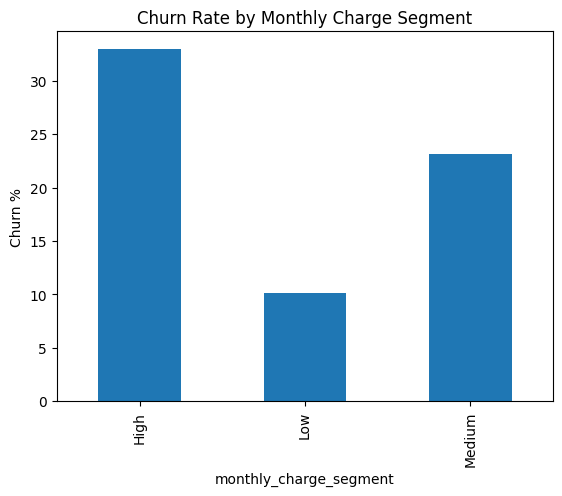

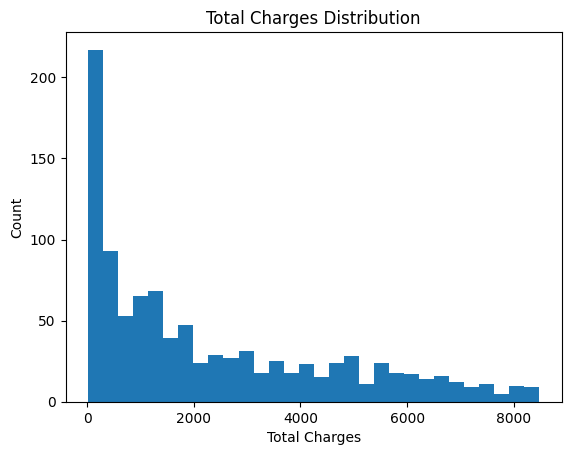

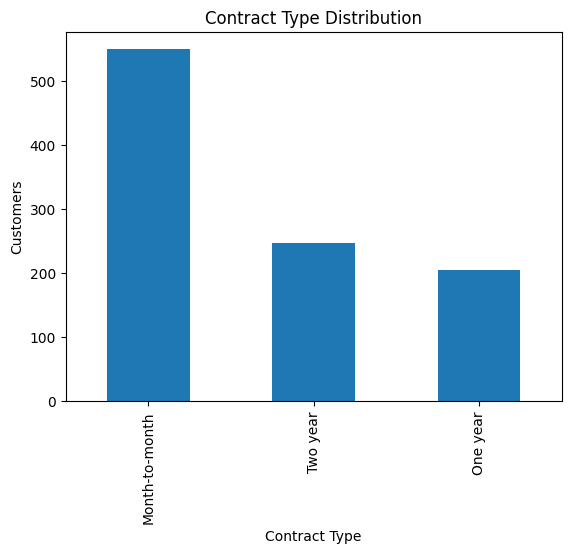

In [7]:
churn_by_segment = (
    df.groupby('monthly_charge_segment')['churn']
      .apply(lambda x: (x == 'Yes').mean() * 100)
)

churn_by_segment.plot(kind='bar', title='Churn Rate by Monthly Charge Segment')
plt.ylabel('Churn %')
plt.show()

# Histogram of Total Charges
plt.hist(df['total_charges'], bins=30)
plt.title("Total Charges Distribution")
plt.xlabel("Total Charges")
plt.ylabel("Count")
plt.show()

# Bar plot of Contract Types
df['contract'].value_counts().plot(kind='bar')
plt.title("Contract Type Distribution")
plt.xlabel("Contract Type")
plt.ylabel("Customers")
plt.show()

In [8]:

print("\n📊 METRICS SUMMARY")
print("-" * 40)
print(f"Churn Percentage: {churn_percentage:.2f}%\n")

print("Average Monthly Charges per Contract:")
print(avg_monthly_by_contract, "\n")

print("Customer Loyalty Distribution:")
print(tenure_distribution, "\n")

print("Internet Service Distribution:")
print(internet_distribution, "\n")

print("Pivot Table: Churn vs Tenure Group")
print(pivot_churn_tenure)


📊 METRICS SUMMARY
----------------------------------------
Churn Percentage: 25.60%

Average Monthly Charges per Contract:
contract
Month-to-month    67.30
One year          68.18
Two year          63.27
Name: monthly_charges, dtype: float64 

Customer Loyalty Distribution:
tenure_group
New         321
Regular     268
Champion    209
Loyal       202
Name: count, dtype: int64 

Internet Service Distribution:
internet_service
Fiber optic    468
DSL            329
No             203
Name: count, dtype: int64 

Pivot Table: Churn vs Tenure Group
churn          No  Yes
tenure_group          
Champion      196   13
Loyal         169   33
New           167  154
Regular       212   56
